The following is an analysis of the depth distribution of hexactinellids as compared with demosponges.

In [1]:
#Imports for statistical analysis and database management
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

The data used here comes from the GPlatesPortal Seafloor Lithology Map (https://portal.gplates.org/portal/seafloor/).

In [2]:
df=pd.read_csv('deep_sea_coral_sponge_data.csv')

C:\Users\Sam She\AppData\Local\Temp\ipykernel_21204\2917557790.py:1: DtypeWarning: Columns (5,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('deep_sea_coral_sponge_data.csv')


In [3]:
#list of higher sponge clades present
target_sponge_name_list=['demosponge','glass sponge','homoscleromorph sponge','calcareous sponge']

#create dataframe of just sponges
sponge_df=df[df.VernacularNameCategory=='sponge (unspecified)']
for name in target_sponge_name_list:
    sponge_df=pd.concat([sponge_df,df[df.VernacularNameCategory==name]])

In [4]:
#seperate sponges based on higher clade
uncat_df=df[df.VernacularNameCategory=='sponge (unspecified)']
demo_df=df[df.VernacularNameCategory=='demosponge']
glass_df=df[df.VernacularNameCategory=='glass sponge']
homo_df=df[df.VernacularNameCategory=='homoscleromorph sponge']
calc_df=df[df.VernacularNameCategory=='calcareous sponge']

In [5]:
#Depth bins created to keep bins consistant among graphs
depth_bins=range(0,6500,500)

Text(0, 0.5, 'Number of Sponges, log transformed')

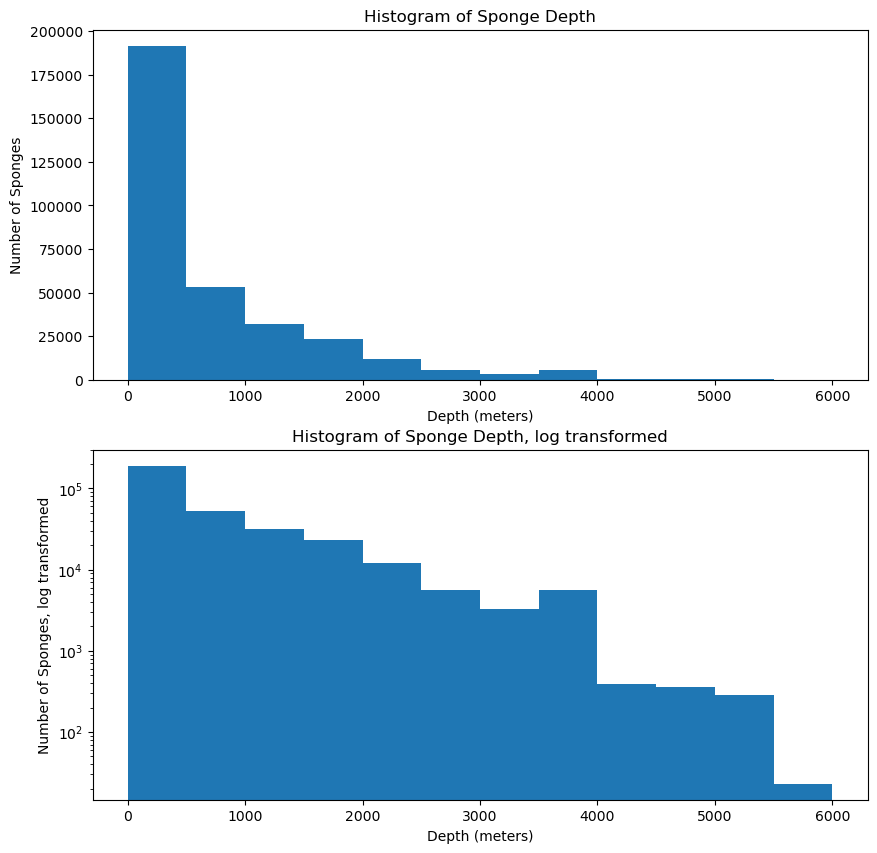

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.hist(sponge_df.DepthInMeters,log=False,bins=depth_bins)
plt.title("Histogram of Sponge Depth")
plt.xlabel("Depth (meters)")
plt.ylabel("Number of Sponges")

plt.subplot(2,1,2)
plt.hist(sponge_df.DepthInMeters,log=True,bins=depth_bins)
plt.title("Histogram of Sponge Depth, log transformed")
plt.xlabel("Depth (meters)")
plt.ylabel("Number of Sponges, log transformed")

The above histograms show the overall sponge depth distribution of the sample. It is somewhat expected that shallower depth ranges will be more heavily surveyed, so this does not necessarily represent the distribution of sponges. These histograms will be included in further histograms to compare different classes of sponges against. In addition, a log plotted histogram is included due to the somewhat logrithmic change in the data and to better observe the smaller counts below 4000 meters.

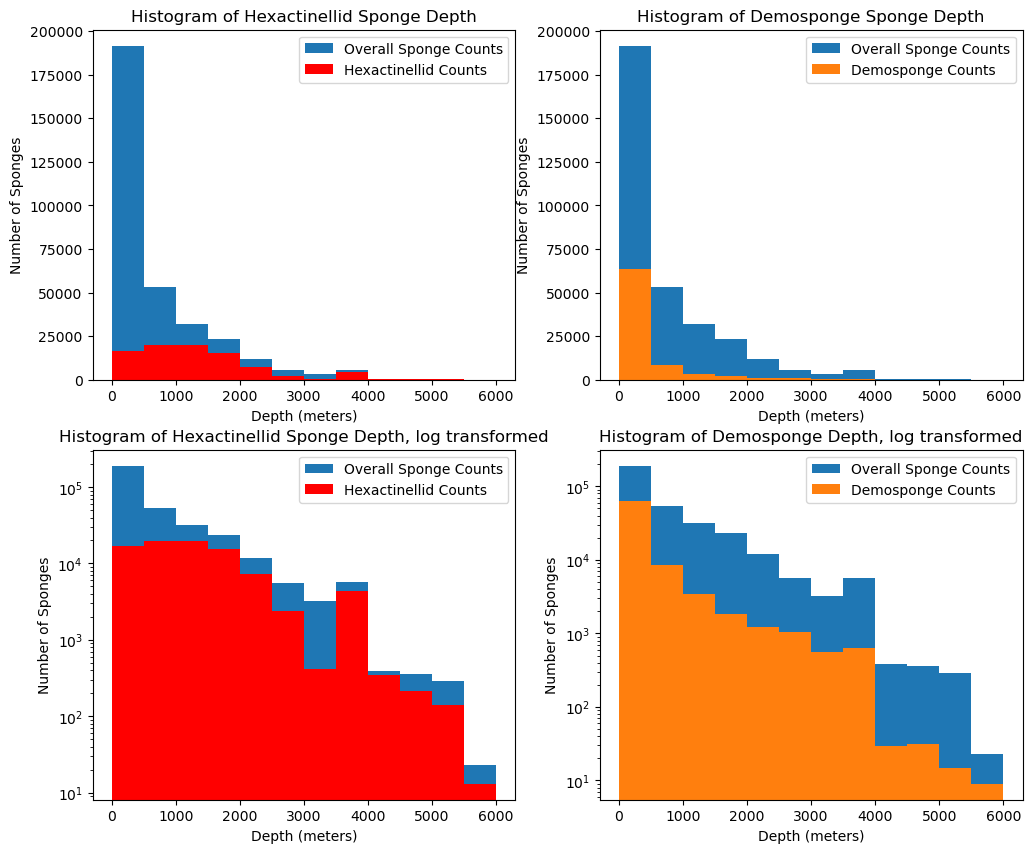

In [7]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.hist(sponge_df.DepthInMeters,log=False, bins=depth_bins,label="Overall Sponge Counts")
plt.hist(glass_df.DepthInMeters,log=False, bins=depth_bins,label="Hexactinellid Counts",color="red")
plt.title("Histogram of Hexactinellid Sponge Depth")
plt.xlabel("Depth (meters)")
plt.ylabel("Number of Sponges")
plt.legend()

plt.subplot(2,2,2)
plt.hist(sponge_df.DepthInMeters,log=False,bins=depth_bins,label="Overall Sponge Counts")
plt.hist(demo_df.DepthInMeters,log=False, bins=depth_bins,label="Demosponge Counts")
plt.title("Histogram of Demosponge Sponge Depth")
plt.xlabel("Depth (meters)")
plt.ylabel("Number of Sponges")
plt.legend()

plt.subplot(2,2,3)
plt.hist(sponge_df.DepthInMeters,log=True, bins=depth_bins,label="Overall Sponge Counts")
plt.hist(glass_df.DepthInMeters,log=True, bins=depth_bins,label="Hexactinellid Counts",color="red")
plt.title("Histogram of Hexactinellid Sponge Depth, log transformed")
plt.xlabel("Depth (meters)")
plt.ylabel("Number of Sponges")
plt.legend()

plt.subplot(2,2,4)
plt.hist(sponge_df.DepthInMeters,log=True,bins=depth_bins,label="Overall Sponge Counts")
plt.hist(demo_df.DepthInMeters,log=True, bins=depth_bins,label="Demosponge Counts")
plt.title("Histogram of Demosponge Depth, log transformed")
plt.xlabel("Depth (meters)")
plt.ylabel("Number of Sponges")
plt.legend()

The above histograms show potential differences in the distribution of demosponges and hexactinellids. While demosponge counts plummet after the first 500 meters, glass sponge counts are relatively consistant for the first 2000 meters, and are fairly consistantly higher than demosponge counts below 500 meters.

In order to determine if the distribution, particularly the central tendency, of the depth of hexactinellids versus demosponges is indeed different, a non-parametric test will be used. The histograms show the samples are clearly not normally distributed, so a Mann-Whitney U test will be performed.

In [7]:
stats.mannwhitneyu(glass_df.DepthInMeters,demo_df.DepthInMeters)

MannwhitneyuResult(statistic=5906813410.5, pvalue=0.0)

Rejecting the null hypothesis of equal central tendency, The Mann Whitney U test confirms some difference in the central tendency of the depth of hexactinellids and demosponges.